There is an undirected connected tree with n nodes labeled from 0 to n - 1 and n - 1 edges.

You are given the integer n and the array edges where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

Return an array answer of length n where answer[i] is the sum of the distances between the ith node in the tree and all other nodes.

 

Example 1:

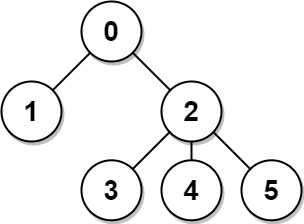


Input: n = 6, edges = [[0,1],[0,2],[2,3],[2,4],[2,5]]
Output: [8,12,6,10,10,10]
Explanation: The tree is shown above.
We can see that dist(0,1) + dist(0,2) + dist(0,3) + dist(0,4) + dist(0,5)
equals 1 + 1 + 2 + 2 + 2 = 8.
Hence, answer[0] = 8, and so on.


Example 2:

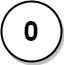


Input: n = 1, edges = []
Output: [0]


Example 3:

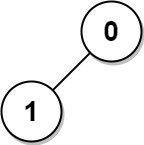

Input: n = 2, edges = [[1,0]]
Output: [1,1]
 

Constraints:

1 <= n <= 3 * 104
edges.length == n - 1
edges[i].length == 2
0 <= ai, bi < n
ai != bi
The given input represents a valid tree.

In [ ]:
class Solution:
    def sumOfDistancesInTree(self, n: int, edges: List[List[int]]) -> List[int]:
        graph = collections.defaultdict(set)
        for u, v in edges:
            graph[u].add(v)
            graph[v].add(u)

        count = [1] * n
        ans = [0] * n
        def dfs(node = 0, parent = None):
            for child in graph[node]:
                if child != parent:
                    dfs(child, node)
                    count[node] += count[child]
                    ans[node] += ans[child] + count[child]

        def dfs2(node = 0, parent = None):
            for child in graph[node]:
                if child != parent:
                    ans[child] = ans[node] - count[child] + n - count[child]
                    dfs2(child, node)

        dfs()
        dfs2()
        return ans